In [9]:
import pickle
import random
import matplotlib.pyplot as plt
from collections import Counter
from utils import Usuari
import pandas as pd

In [2]:
estils_literaris = ["Modernisme","Noucentisme","Surrealisme","Realisme","Romanticisme","Barroquisme","Simbolisme","Escola Mallorquina","Escola Valenciana","Escola Catalana"
]

temes_de_llibres = [
    'Amor','Aventura','Ciència-ficció','Fantasia','Misteri','Històric','Romàntic','Drama','Comèdia','Thriller','Horror','Filosofia','Autoajuda','Biografia','Poesia','Clàssic','Infantil','Jovenil','No-ficció','Crim','Viatges','Ciència','Humor','Religió','Esport','Política','Culinària','Terror','Ecològic','Educatiu','Futurista','Western','Espionatge','Art','Negoci','Familiar','Ficció històrica','Romanticisme','Conte de fades','Teatre','Mitologia','Ucronia','Apocalíptic','Ciberpunk','Distopia','Realisme màgic','Satira'
]

complexitat = ['baixa','mitja','alta']

demografia = ['infantil','juvenil','adult']

situacio= ['estudiant', 'treballador', 'atur', 'jubilitat']

estat_civil= ['solter', 'casat', 'divorciat', 'viudu']

llibres= []

In [3]:
atributs = [estils_literaris,temes_de_llibres,complexitat,demografia,situacio,estat_civil,llibres]

In [4]:
probabilitats_normalitzades=[]
num_usuaris = 100
llistes_categories=atributs
# Bucle per cada llista de categories
for llista_categories in llistes_categories:
    # Generar probabilitats aleatòries per a cada categoria
    probs=[random.uniform(0.01, 1) for _ in range(len(llista_categories))]

    # Normalitzar les probabilitats perquè sumin 1
    probabilitats_normalitzades.append([prob / sum(probs) for prob in probs])
    

llista_diccionaris=[]
for _ in range(num_usuaris):
    llibres_recomenats=[]
    for i in range(3):
        llibre_recomenat=random.choices(llistes_categories[7], weights=probabilitats_normalitzades[7])[0]
        while llibre_recomenat in llibres_recomenats:
            llibre_recomenat=random.choices(llistes_categories[7], weights=probabilitats_normalitzades[7])[0]
        llibres_recomenats.append(llibre_recomenat)

    llista_diccionaris.append({'estils_literaris': random.choices(llistes_categories[0], weights=probabilitats_normalitzades[0])[0],
                       'temes_de_llibres': random.choices(llistes_categories[1], weights=probabilitats_normalitzades[1])[0],
                       'complexitat': random.choices(llistes_categories[2], weights=probabilitats_normalitzades[2])[0],
                       'demografia': random.choices(llistes_categories[3], weights=probabilitats_normalitzades[3])[0],
                       'situacio': random.choices(llistes_categories[4], weights=probabilitats_normalitzades[4])[0],
                       'estat_civil': random.choices(llistes_categories[5], weights=probabilitats_normalitzades[5])[0],
                       'llibres_recomanats': llibres_recomenats,
                       'puntuacio_llibres': random.sample(range(6), 3)
                       } )


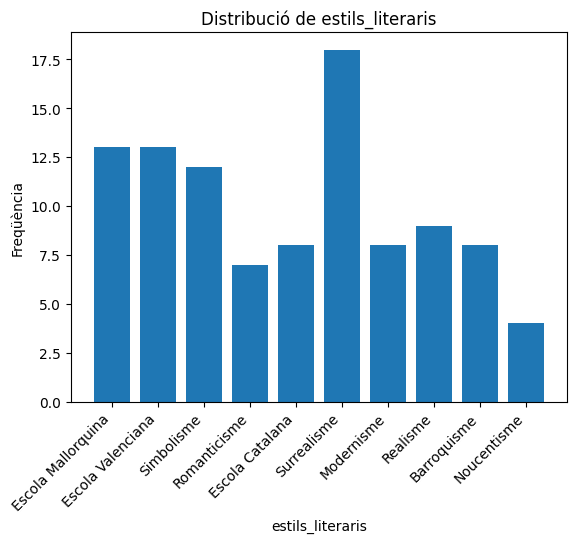

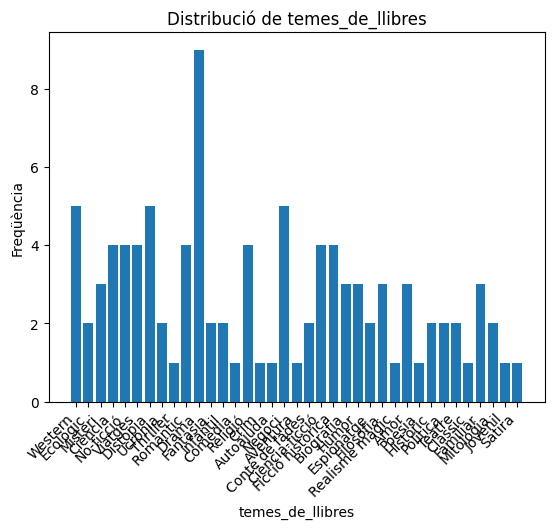

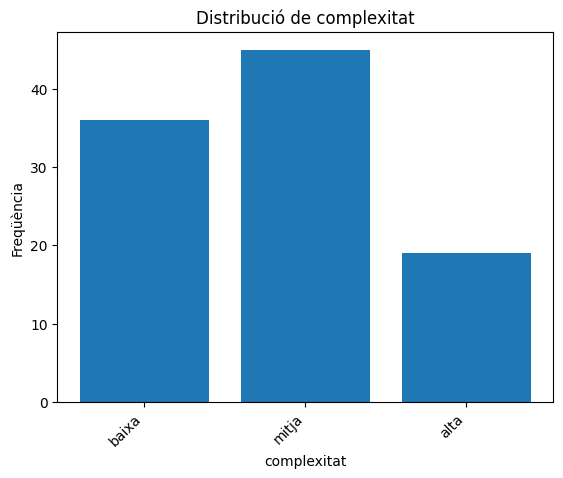

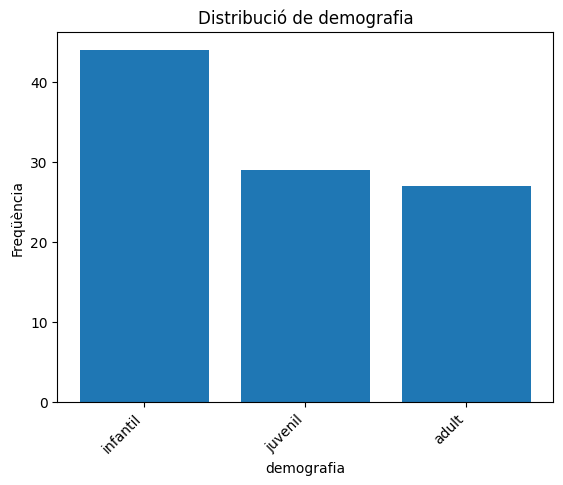

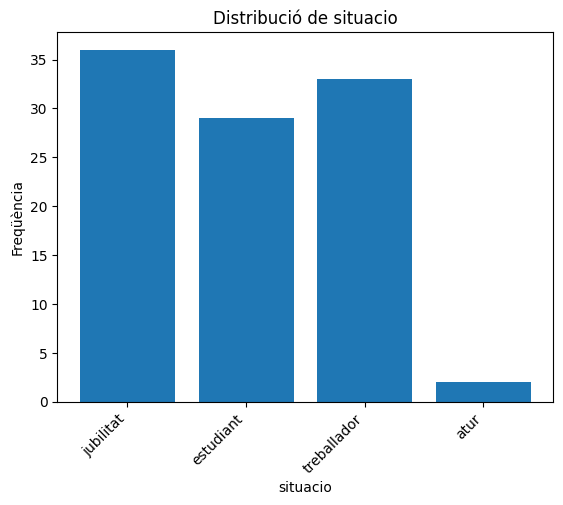

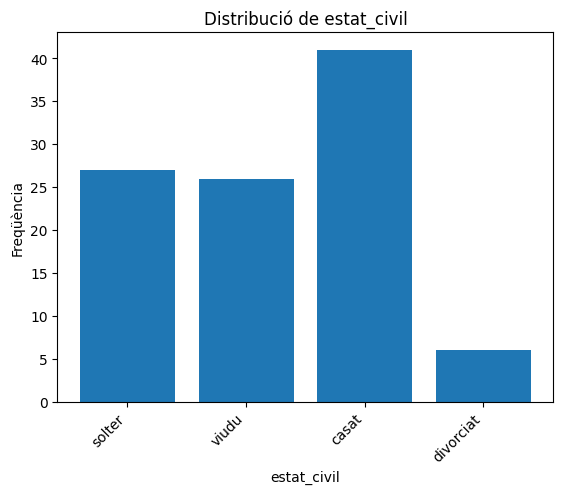

In [5]:
for clau in llista_diccionaris[0].keys():
    # Obtenir els valors de la clau de tota la llista
    valors_clau = [diccionari[clau] for diccionari in llista_diccionaris]
    
    # Comptar la freqüència de cada valor
    contador = Counter(valors_clau)
    
    # Crear un gràfic de barres amb les freqüències
    plt.bar(contador.keys(), contador.values())
    plt.xlabel(clau)
    plt.ylabel('Freqüència')
    plt.title(f'Distribució de {clau}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [10]:
pd.DataFrame(llista_diccionaris)

,estils_literaris,temes_de_llibres,complexitat,demografia,situacio,estat_civil
0,Escola Mallorquina,Western,baixa,infantil,jubilitat,solter
1,Escola Valenciana,Ecològic,mitja,infantil,estudiant,viudu
2,Simbolisme,Misteri,mitja,juvenil,estudiant,viudu
3,Escola Mallorquina,Ciència,mitja,adult,treballador,casat
4,Romanticisme,No-ficció,alta,adult,treballador,casat
...,...,...,...,...,...,...
95,Barroquisme,Mitologia,baixa,infantil,treballador,viudu
96,Escola Mallorquina,Amor,baixa,juvenil,jubilitat,viudu
97,Escola Valenciana,Filosofia,baixa,infantil,treballador,casat
98,Escola Valenciana,Satira,mitja,infantil,estudiant,viudu


In [7]:
instancies_teus_objectes = [Usuari(i,diccionari) for i,diccionari in enumerate(llista_diccionaris)]

# Mostrar les instàncies creatades
for instancia in instancies_teus_objectes:
    print(instancia.__dict__)

KeyError: 'llibres_recomanats'